In [1]:
!pip install cvxpy


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import random
import os
import time

import numpy as np
import cvxpy as cp
import ot
import ot.plot
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Polygon
from matplotlib import gridspec
from scipy.special import factorial, gamma
import seaborn as sns

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.size"] = 14
plt.rcParams["legend.fontsize"] = 14
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 4.0
plt.rcParams["xtick.minor.size"] = 2.0
plt.rcParams["ytick.major.size"] = 4.0
plt.rcParams["ytick.minor.size"] = 2.0
plt.rcParams["axes.linewidth"] = 0.8
plt.rcParams["legend.handlelength"] = 2.0
minor_locator = AutoMinorLocator(4)

## 1/ Linear Programming

### a) Bài toán Linear Programming

**Bài toán tối ưu** toán học là bài toán tối ưu hoá hàm số (hàm mục tiêu) thỏa mãn điều kiện ràng buộc nào đó.

Trong mảng bài toán tối ưu, ta đặc biệt quan tâm đến bài toán quy hoạch tuyến tính (linear programming). QHTT là bài toán tối ưu trên tập $\mathbb{R}^n$ trong đó hàm mục tiêu là một hàm tuyến tính có dạng
$$c_1 x_1+c_2 x_2+\cdots+c_n x_n$$

Trong đó $c_i \in \mathbb{R}; \; i=1, \ldots, n$ và điều kiện ràng buộc là tập hợp các nghiệm thoả mãn các điều kiện bất đẳng thức và đẳng thức tuyến tính có dạng sau:
$$a_{i 1} x_i+a_{i 2} x_2+\cdots+a_{i n} x_n \leq b_i \quad i=1,\ldots, s$$
$$a_{i 1} x_i+a_{i 2} x_2+\cdots+a_{i n} x_n=b_i \quad i=s+1, \ldots, m$$
Bài toán quy hoạch tuyến tính là một công cụ mạnh giúp ta giải quyết được nhiều bài toán tối ưu trong thực tế như phân bổ nguồn lực (Resource allocation), thiết kế lịch trình sản xuất (production schedulling), phân tích vị trí cơ sở (optimal facility location) hay tối ưu danh mục đầu tư (portfolio optimization).

Một bài toán LP tổng quát được mô tả dưới dạng:
$$
$$

\begin{aligned}
    \min_{\mathbf{x} \in \mathbb{R}^n} \quad & \mathbf{c}^T \mathbf{x} \\
    \text{s.t} \quad & \mathbf{A} \mathbf{x} \leq \mathbf{b}, \quad \text{(các ràng buộc bất đẳng thức tuyến tính)}, \\
                     & \mathbf{E} \mathbf{x} = \mathbf{f}, \quad \text{(các ràng buộc đẳng thức tuyến tính)}, \\
                     & \mathbf{x} \geq 0, \quad \text{(ràng buộc không âm)}.
\end{aligned}

**Trong đó**:
- $\mathbf{x} \in \mathbb{R}^n$ là vector biến cần tối ưu hóa.
- $\mathbf{c} \in \mathbb{R}^n$ là vector hệ số của hàm mục tiêu.
- $\mathbf{A} \in \mathbb{R}^{m \times n}$ và $\mathbf{b} \in \mathbb{R}^m$ biểu diễn các ràng buộc bất đẳng thức.
- $\mathbf{E} \in \mathbb{R}^{p \times n}$ và $\mathbf{f} \in \mathbb{R}^p$ biểu diễn các ràng buộc đẳng thức.

#### Ví dụ: ####

Cho bài toán:
\begin{aligned}
    \min_{\mathbf{x} \in \mathbb{R}^2} \quad & 3x_1 + 2x_2 \\
    \text{s.t} \quad & x_1 + x_2 \geq 4, \quad \text{(bất đẳng thức tuyến tính 1)}, \\
                     & 2x_1 + x_2 \leq 8, \quad \text{(bất đẳng thức tuyến tính 2)}, \\
                     & x_1 - x_2 = 1, \quad \text{(đẳng thức tuyến tính)}, \\
                     & x_1, x_2 \geq 0, \quad \text{(ràng buộc không âm)}.
\end{aligned}

Optimal solution: x* = [array(2.5), array(1.5)]
Optimal value: f(x*) = 10.499999996930423
Strictly feasible point: [2, 3]


C:\Users\Minhk\AppData\Local\Temp\ipykernel_36480\3479755910.py:56: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(
C:\Users\Minhk\AppData\Local\Temp\ipykernel_36480\3479755910.py:71: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(


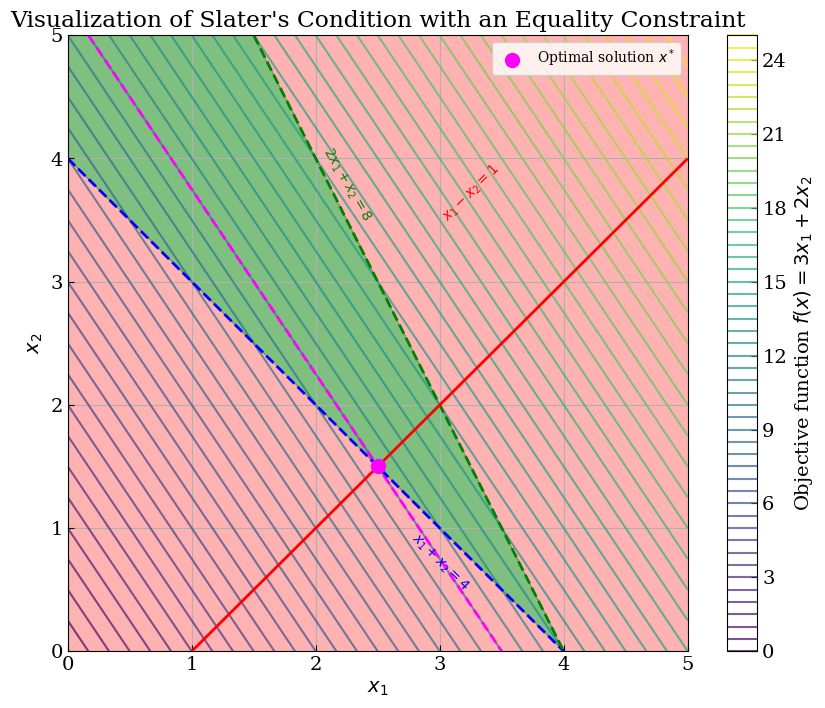

In [ ]:
# Define CVXPY variables
x1 = cp.Variable()
x2 = cp.Variable()

# Define the objective function
objective = cp.Minimize(3 * x1 + 2 * x2)

# Define constraints, including equality
constraints = [
    x1 + x2 >= 4,  # Inequality constraint 1
    2 * x1 + x2 <= 8,  # Inequality constraint 2
    x1 - x2 == 1,  # Equality constraint
    x1 >= 0,  # Non-negativity constraint
    x2 >= 0,  # Non-negativity constraint
]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Optimal solution
x_star = [x1.value, x2.value]
optimal_value = 3 * x_star[0] + 2 * x_star[1]
print(f"Optimal solution: x* = {x_star}")
print(f"Optimal value: f(x*) = {optimal_value}")

# Strictly feasible point (satisfying Slater's condition for inequalities)
strictly_feasible_x = [2, 3]  # Must satisfy inequalities, not necessarily the equality
print(f"Strictly feasible point: {strictly_feasible_x}")

# Grid for visualization
x1_vals = np.linspace(0, 5, 500)
x2_vals = np.linspace(0, 5, 500)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Evaluate constraints
G1 = X1 + X2 - 4  # Inequality 1: x1 + x2 >= 4
G2 = 2 * X1 + X2 - 8  # Inequality 2: 2x1 + x2 <= 8
E = X1 - X2 - 1  # Equality: x1 - x2 = 1

# Evaluate the objective function
Z = 3 * X1 + 2 * X2

# Create a mask for the feasible region
feasible_mask = (G1 >= 0) & (G2 <= 0) & (X1 >= 0) & (X2 >= 0)

# Plot the feasible region
plt.figure(figsize=(10, 8))

# Highlight the infeasible regions (red)
plt.contourf(X1, X2, ~feasible_mask, levels=[0.5, 1], colors=["red"], alpha=0.3)

# Highlight the feasible region (green)
plt.contourf(
    X1,
    X2,
    feasible_mask,
    levels=[0.5, 1],
    colors=["green"],
    alpha=0.5,
    label="Feasible region",
)

# Add objective function contours
contours = plt.contour(X1, X2, Z, levels=50, cmap="viridis", alpha=0.7)
plt.colorbar(contours, label="Objective function $f(x) = 3x_1 + 2x_2$")

# Add the contour for the optimal value
plt.contour(
    X1,
    X2,
    Z,
    levels=[optimal_value],
    colors="magenta",
    linewidths=2,
    linestyles="--",
    label="Optimal contour",
)

# Plot constraint lines
plt.contour(X1, X2, G1, levels=[0], colors="blue", linestyles="--", linewidths=2)
plt.contour(X1, X2, G2, levels=[0], colors="green", linestyles="--", linewidths=2)
plt.contour(X1, X2, E, levels=[0], colors="red", linestyles="-", linewidths=2)

# Add text annotations for constraints
plt.text(
    3, 0.5, "$x_1 + x_2 = 4$", color="blue", fontsize=10, rotation=-45, ha="center"
)
plt.text(
    2.25, 3.5, "$2x_1 + x_2 = 8$", color="green", fontsize=10, rotation=-60, ha="center"
)
plt.text(
    3.25, 3.5, "$x_1 - x_2 = 1$", color="red", fontsize=10, rotation=45, ha="center"
)

# Plot the optimal solution
plt.scatter(*x_star, color="magenta", s=100, label="Optimal solution $x^*$", zorder=5)

# Add labels, legend, and grid
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Visualization of the Linear Programming problem")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True)
plt.show()

### b) Slater's Condition

**Slater’s Condition** là một điều kiện quan trọng trong lý thuyết tối ưu hóa lồi, đảm bảo tính chặt chẽ của điều kiện đối ngẫu (duality) và sự tồn tại của nghiệm đối ngẫu. Slater’s Condition cung cấp cơ sở để áp dụng mạnh mẽ các phương pháp tối ưu hóa và đảm bảo rằng bài toán đối ngẫu (dual problem) không có khoảng cách đối ngẫu (zero duality gap).

Điều kiện này không chỉ hữu ích trong việc kiểm tra tính khả thi của bài toán mà còn là nền tảng cho các phương pháp tối ưu hóa hiện đại như phương pháp Lagrange.


**4.1 Phát biểu Slater’s Condition**

Xét bài toán tối ưu hóa lồi:
$$
\min_{x \in \mathbb{R}^n} f(x)
$$
**subject to:**
$$
g_i(x) \leq 0, \quad i = 1, \dots, m, \quad \text{(ràng buộc bất đẳng thức)},
$$
$$
A x = b, \quad \text{(ràng buộc đẳng thức)}.
$$

Slater’s Condition phát biểu như sau:
- Nếu $f(x)$ và các $g_i(x)$ là các hàm lồi, và tập khả thi không rỗng,
- Tồn tại một điểm $x^* \in \mathbb{R}^n$ thỏa mãn:
  $$
  g_i(x^*) < 0, \quad \forall i = 1, \dots, m,
  $$
  $$
  A x^* = b,
  $$
  thì bài toán thỏa mãn **Slater’s Condition**.


**4.2 Ý nghĩa của Slater’s Condition**

Slater’s Condition đóng vai trò quan trọng trong lý thuyết tối ưu hóa:

- **Đảm bảo tính chặt chẽ của đối ngẫu:** Nếu Slater’s Condition được thỏa mãn, thì khoảng cách đối ngẫu (*duality gap*) giữa bài toán primal và dual bằng 0, nghĩa là:
  $$
  \min_x f(x) = \max_{\lambda, \nu} \mathcal{L}(x, \lambda, \nu),
  $$
  trong đó $\mathcal{L}(x, \lambda, \nu)$ là hàm Lagrangian.

- **Tồn tại nghiệm dual:** Điều kiện đảm bảo nghiệm đối ngẫu $\lambda^*, \nu^*$ tồn tại và hữu ích cho việc giải bài toán primal.

- **Mở rộng bài toán convex:** Slater’s Condition thường được sử dụng để đảm bảo tính chặt chẽ của các bài toán lồi có cả ràng buộc bất đẳng thức và đẳng thức.

Optimal solution: x* = [array(2.5), array(1.5)]
Optimal value: f(x*) = 10.499999996930423
Strictly feasible point: [2, 3]


C:\Users\Minhk\AppData\Local\Temp\ipykernel_36480\2481351086.py:60: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(
C:\Users\Minhk\AppData\Local\Temp\ipykernel_36480\2481351086.py:75: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(


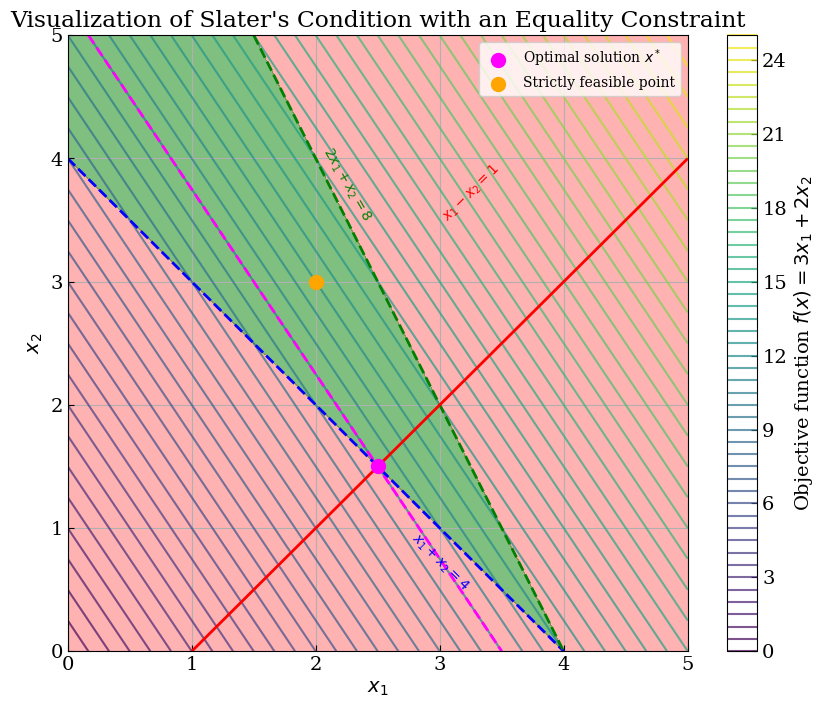

In [ ]:
# Define CVXPY variables
x1 = cp.Variable()
x2 = cp.Variable()

# Define the objective function
objective = cp.Minimize(3 * x1 + 2 * x2)

# Define constraints, including equality
constraints = [
    x1 + x2 >= 4,  # Inequality constraint 1
    2 * x1 + x2 <= 8,  # Inequality constraint 2
    x1 - x2 == 1,  # Equality constraint
    x1 >= 0,  # Non-negativity constraint
    x2 >= 0,  # Non-negativity constraint
]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Optimal solution
x_star = [x1.value, x2.value]
optimal_value = 3 * x_star[0] + 2 * x_star[1]
print(f"Optimal solution: x* = {x_star}")
print(f"Optimal value: f(x*) = {optimal_value}")

# Strictly feasible point (satisfying Slater's condition for inequalities)
strictly_feasible_x = [2, 3]  # Must satisfy inequalities, not necessarily the equality
print(f"Strictly feasible point: {strictly_feasible_x}")

# Grid for visualization
x1_vals = np.linspace(0, 5, 500)
x2_vals = np.linspace(0, 5, 500)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Evaluate constraints
G1 = X1 + X2 - 4  # Inequality 1: x1 + x2 >= 4
G2 = 2 * X1 + X2 - 8  # Inequality 2: 2x1 + x2 <= 8
E = X1 - X2 - 1  # Equality: x1 - x2 = 1

# Evaluate the objective function
Z = 3 * X1 + 2 * X2

# Create a mask for the feasible region
feasible_mask = (G1 >= 0) & (G2 <= 0) & (X1 >= 0) & (X2 >= 0)

# Plot the feasible region
plt.figure(figsize=(10, 8))

# Highlight the infeasible regions (red)
plt.contourf(X1, X2, ~feasible_mask, levels=[0.5, 1], colors=["red"], alpha=0.3)

# Highlight the feasible region (green)
plt.contourf(
    X1,
    X2,
    feasible_mask,
    levels=[0.5, 1],
    colors=["green"],
    alpha=0.5,
    label="Feasible region",
)

# Add objective function contours
contours = plt.contour(X1, X2, Z, levels=50, cmap="viridis", alpha=0.7)
plt.colorbar(contours, label="Objective function $f(x) = 3x_1 + 2x_2$")

# Add the contour for the optimal value
plt.contour(
    X1,
    X2,
    Z,
    levels=[optimal_value],
    colors="magenta",
    linewidths=2,
    linestyles="--",
    label="Optimal contour",
)

# Plot constraint lines
plt.contour(X1, X2, G1, levels=[0], colors="blue", linestyles="--", linewidths=2)
plt.contour(X1, X2, G2, levels=[0], colors="green", linestyles="--", linewidths=2)
plt.contour(X1, X2, E, levels=[0], colors="red", linestyles="-", linewidths=2)

# Add text annotations for constraints
plt.text(
    3, 0.5, "$x_1 + x_2 = 4$", color="blue", fontsize=10, rotation=-45, ha="center"
)
plt.text(
    2.25, 3.5, "$2x_1 + x_2 = 8$", color="green", fontsize=10, rotation=-60, ha="center"
)
plt.text(
    3.25, 3.5, "$x_1 - x_2 = 1$", color="red", fontsize=10, rotation=45, ha="center"
)

# Plot the optimal solution
plt.scatter(*x_star, color="magenta", s=100, label="Optimal solution $x^*$", zorder=5)

# Plot the strictly feasible point
plt.scatter(
    strictly_feasible_x[0],
    strictly_feasible_x[1],
    color="orange",
    s=100,
    label="Strictly feasible point",
    zorder=5,
)

# Add labels, legend, and grid
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Visualization of Slater's Condition")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True)
plt.show()

## 2/ Optimal Transport & Partial Optimal Transport

**Optimal Transport (OT)** là một thuật toán di chuyển tối ưu một khối lượng vật chất (mass) từ một phân phối $\mathbf{r}$ đến một phân phối $\mathbf{c}$  

Trong bài toán OT, chúng ta cần tìm lời giải tối ưu $\mathbf{X}$ cho bài toán tối ưu, với $\mathbf{X}$ là transport map biểu thị cách di chuyển tối ưu khối lượng giữa 2 phân phối: 
$$ \min_{\mathbf{X} \in U(\mathbf{r},\mathbf{c})} \langle \mathbf{C}, \mathbf{X} \rangle$$
với: 
+ $\sum_j \mathbf{X}_{i,j} = \mathbf{r}$ (tổng hàng tương đương 1 phần tử trong $\mathbf{r}$)
+ $\sum_i \mathbf{X}_{i,j} = \mathbf{c}$ (tổng cột tương đương với 1 phần tử trong $\mathbf{c}$)
+ $\mathbf{X} \geq 0$
+ $U(\mathbf{r}, \mathbf{c})$ là tập hợp các nghiệm $\mathbf{X}$ thỏa mãn 3 điều kiện trên: $$ U(\mathbf{r}, \mathbf{c}) = \{ \mathbf{X} \mid 1_n^T\mathbf{X}1_n = 1, \, \mathbf{X}1_n = \mathbf{r}, \, \mathbf{X}^T1_n = \mathbf{c}, \, \mathbf{X} \geq 0\},  $$

Khi đó, nghiệm $\mathbf{X}$ sẽ là dạng một ma trận có cùng cấu trúc và kích thước với một không gian lưới vuông được tạo ra bởi 2 phân phối $\mathbf{r}$ và $\mathbf{c}$

**Partial Optimal Transport (POT)** sẽ giãn điều kiện bắt buộc phải di chuyển hết các vật chất giữa phân phối $\mathbf{r}$ đến một phân phối $\mathbf{c}$.  
Nói cách khác, POT sẽ chỉ tập trung di chuyển một phần vật chất của phân phối $\mathbf{r}$ đến phân phối $\mathbf{c}$.  
Vì thế, bài toán POT được viết lại thành:
$$ \min_{\mathbf{X} \in U(\mathbf{r},\mathbf{c}, s)} \langle \mathbf{C}, \mathbf{X} \rangle$$
với:
+ $\sum_j \mathbf{X}_{i,j} \leq \mathbf{r}$ (tổng hàng gần bằng 1 phần tử trong $\mathbf{r}$)
+ $\sum_i \mathbf{X}_{i,j} \leq \mathbf{c}$ (tổng cột gần bằng với 1 phần tử trong $\mathbf{c}$)
+ $\sum_i \sum_j \mathbf{X}_{i,j} = s$
+ $\mathbf{X} \geq 0$
+ $U(\mathbf{r}, \mathbf{c}, s)$ là tập hợp các nghiệm $\mathbf{X}$ thỏa mãn 4 điều kiện trên: $$ U(\mathbf{r}, \mathbf{c}) = \{ \mathbf{X} \mid 1_n^T\mathbf{X}1_n = s, \, \mathbf{X}1_n \leq \mathbf{r}, \, \mathbf{X}^T1_n \leq \mathbf{c}, \, \mathbf{X} \geq 0\}$$

**Câu hỏi**: Ở điều kiện nào của r và c thì bài toán POT sẽ tương đương bài toán OT

**Ví dụ**: Có 8 tiệm bánh và 5 tiệm cafe trong thành phố.  
Các tiệm bánh sản xuất lần lượt là: 31, 48, 82, 30, 40, 48, 89, 73  
Các tiệm cafe lần lượt bán số bánh mỗi ngày là: 82, 88, 92, 88, 91  
Bài toán: Làm sao cung cấp đủ số bánh cho các quán cafe, đồng thời giảm tối thiểu giá vận chuyển

Số bánh nướng được ở từng tiệm bánh: [31. 48. 82. 30. 40. 48. 89. 73.]
Số bánh bán được ở từng cafe: [82. 88. 92. 88. 91.]
Tổng số bánh bán được ở các quán cafe: 441.0
Vị trí các tiệm bánh: [[184.86464733 201.8163543 ]
 [449.3486663  168.40784664]
 [245.41756746 288.12166576]
 [273.95400109 364.68282915]
 [494.58935376 336.8424061 ]
 [738.19305545 238.70491485]
 [736.10502372 375.12298779]
 [537.74200949 482.30861653]]
Vị trí các tiệm cafe: [[302.08410452 442.78633642]
 [345.1162221  368.52123027]
 [449.226184   201.94529124]
 [454.08464888 387.95508982]
 [627.60125204 408.7770822 ]]


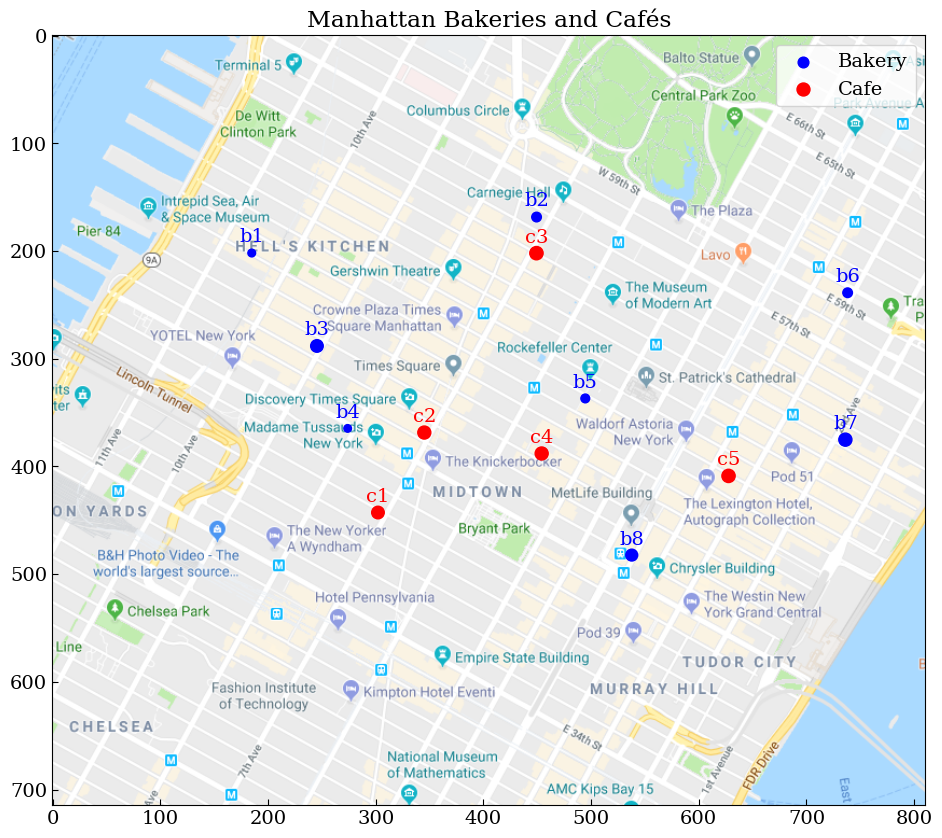

In [5]:
data = np.load(os.path.abspath("manhattan.npz"))
bakery_pos = data["bakery_pos"]
bakery_prod = data["bakery_prod"]
extra_bakery_prod = np.array([100, 100, 100, 100, 100, 100, 100, 100])
cafe_pos = data["cafe_pos"]
cafe_prod = data["cafe_prod"]
Imap = data["Imap"]
print("Số bánh nướng được ở từng tiệm bánh: {}".format(bakery_prod))
print("Số bánh bán được ở từng cafe: {}".format(cafe_prod))
print("Tổng số bánh bán được ở các quán cafe: {}".format(cafe_prod.sum()))
print("Vị trí các tiệm bánh: {}".format(bakery_pos))
print("Vị trí các tiệm cafe: {}".format(cafe_pos))

# vẽ các tiệm cafe và bánh trên bản đồ.
# Kích cỡ của điểm tròn biểu thị sản lượng bánh được làm/bán
plt.figure()
plt.imshow(data["Imap"], interpolation="bilinear")
plt.scatter(bakery_pos[:, 0], bakery_pos[:, 1], color="b", s=bakery_prod)
plt.scatter(cafe_pos[:, 0], cafe_pos[:, 1], color="r", s=cafe_prod)

# Plot bakery positions with labels
for i, pos in enumerate(bakery_pos):
    plt.text(pos[0], pos[1] - 10, f"b{i+1}", color="b", ha="center")

# Plot cafe positions with labels
for i, pos in enumerate(cafe_pos):
    plt.text(pos[0], pos[1] - 10, f"c{i+1}", color="r", ha="center")
plt.legend(["Bakery", "Cafe"])
plt.title("Manhattan Bakeries and Cafés")
plt.show()

# Cho dễ theo dõi các vị trí vector cost tương ứng với khoảng cách nào
# ta tạo 1 list các tên biến với b là tiệm bánh và c là cafe
b_label_list = ["b" + str(i + 1) for i in range(len(bakery_pos))]
c_label_list = ["c" + str(i + 1) for i in range(len(cafe_pos))]
label_list = [
    b_label + "_" + c_label for b_label in b_label_list for c_label in c_label_list
]

<AxesSubplot:>

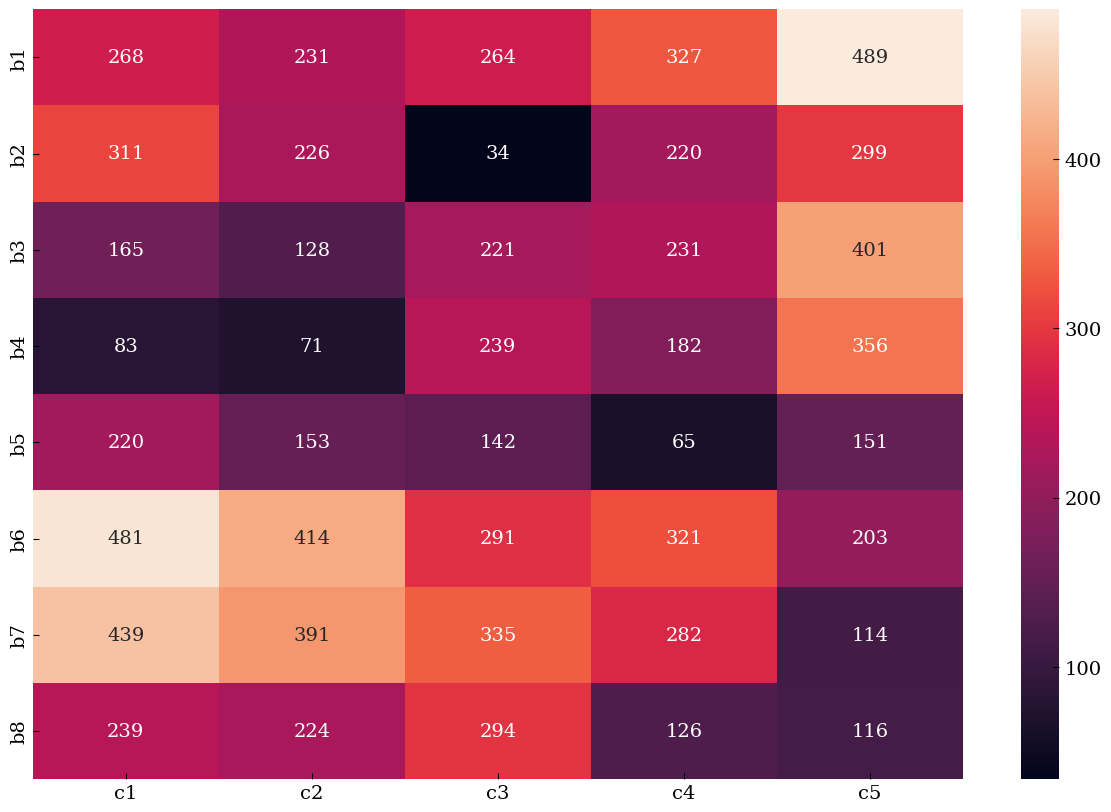

In [6]:
# Tạo cost matrix
cost_matrix = np.zeros((len(bakery_pos), len(cafe_pos)))
for i in range(len(bakery_pos)):
    dist_to_cafe = []
    for j in range(len(cafe_pos)):
        cost_matrix[i, j] = np.linalg.norm(bakery_pos[i] - cafe_pos[j])
sns.heatmap(cost_matrix, annot=True, fmt=".0f", xticklabels=c_label_list, yticklabels=b_label_list)

### a) OT trên CVXPY

**Formulation**
\begin{align}
   & \min_{x} && \sum_{i=1}^n \sum_{j=1}^m \mathbf{C}_{ij} \mathbf{X}_{ij} \\
   & \text{subject to} && \sum_{j=1}^m \mathbf{X}_{ij} = \mathbf{r}_i, \quad i = 1, \ldots, n \\
   & && \sum_{i=1}^n \mathbf{X}_{ij} = \mathbf{c}_j, \quad j = 1, \ldots, m \\
   & && x_{ij} \geq 0, \quad \forall i, j
\end{align}

Với:
+ $\mathbf{C}_{ij}$: chi phí vận chuyển từ tiệm bánh i đến tiệm cafe j
+ $\mathbf{X}_{ij}$: số lượng bánh vận chuyển từ tiệm bánh i đến tiệm cafe j
+ $\mathbf{r}_i$: số bánh từ tiệm bánh i
+ $\mathbf{c}_j$: số bánh bán từ tiệm cafe j

Restricted license - for non-production use only - expires 2025-11-24
Chi phí vận chuyển tối ưu: 61523.15971278249
Đường đi tối ưu:
Tiệm bánh 1 đến quán cafe 3 25 bánh
Tiệm bánh 1 đến quán cafe 4 30 bánh
Tiệm bánh 2 đến quán cafe 3 27 bánh
Tiệm bánh 2 đến quán cafe 4 31 bánh
Tiệm bánh 3 đến quán cafe 1 57 bánh
Tiệm bánh 4 đến quán cafe 3 48 bánh
Tiệm bánh 5 đến quán cafe 2 44 bánh
Tiệm bánh 6 đến quán cafe 4 40 bánh
Tiệm bánh 6 đến quán cafe 5 2 bánh
Tiệm bánh 7 đến quán cafe 2 46 bánh
Tiệm bánh 8 đến quán cafe 3 2 bánh
Tiệm bánh 8 đến quán cafe 4 89 bánh
Tổng số bánh đã được giao: 441.0
Số bánh nướng được ở từng tiệm bánh: [31. 48. 82. 30. 40. 48. 89. 73.]
Số bánh bán được ở từng cafe: [82. 88. 92. 88. 91.]
Tổng số bánh bán được ở các quán cafe: 441.0


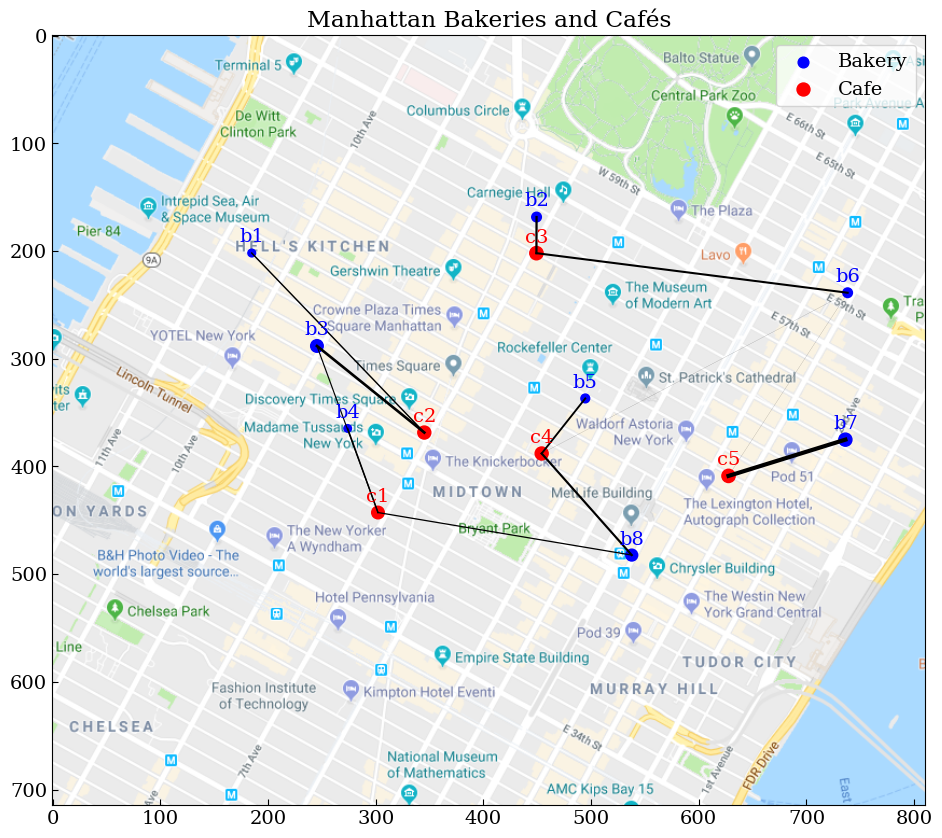

In [7]:
# Biến quyết định
ot_X = cp.Variable((len(bakery_pos), len(cafe_pos)), integer=True)

# Hàm mục tiêu
objective = cp.Minimize(cp.sum(cp.multiply(cost_matrix, ot_X)))

# Ràng buộc
constraints = [cp.sum(ot_X, axis=1) == bakery_prod,
               cp.sum(ot_X, axis=0) == cafe_prod,
               ot_X >= 0]

# Giải bài toán
start_time = time.time()
problem = cp.Problem(objective, constraints)
optimal = problem.solve()
cvxpy_ot_time = time.time() - start_time

# In ra kết quả
print("Chi phí vận chuyển tối ưu:", optimal)
print("Đường đi tối ưu:")
for i in range(len(ot_X.flatten().value)):
    if ot_X.flatten().value[i] > 0:
        print(
            "Tiệm bánh "
            + label_list[i][1:2]
            + " đến quán cafe "
            + label_list[i][4:]
            + " "
            + str(int(ot_X.flatten().value[i]))
            + " bánh"
        )
print("Tổng số bánh đã được giao:", np.sum(ot_X.value))
print("Số bánh nướng được ở từng tiệm bánh: {}".format(bakery_prod))
print("Số bánh bán được ở từng cafe: {}".format(cafe_prod))
print("Tổng số bánh bán được ở các quán cafe: {}".format(cafe_prod.sum()))

# vẽ các tiệm cafe và bánh trên bản đồ.
# Kích cỡ của điểm tròn biểu thị sản lượng bánh được làm/bán
# Độ đậm nhạt của đường thẳng biểu thị số bánh được giao
plt.figure()
plt.imshow(data["Imap"], interpolation="bilinear")
plt.scatter(bakery_pos[:, 0], bakery_pos[:, 1], color="b", s=bakery_prod)
plt.scatter(cafe_pos[:, 0], cafe_pos[:, 1], color="r", s=cafe_prod)
for i in range(len(bakery_pos)):
    for j in range(len(cafe_pos)):
        plt.plot(
            [bakery_pos[i, 0], cafe_pos[j, 0]],
            [bakery_pos[i, 1], cafe_pos[j, 1]],
            "-k",
            lw=3.0 * ot_X.value[i, j] / ot_X.value.max(),
        )
# Plot bakery positions with labels
for i, pos in enumerate(bakery_pos):
    plt.text(pos[0], pos[1] - 10, f"b{i+1}", color="b", ha="center")

# Plot cafe positions with labels
for i, pos in enumerate(cafe_pos):
    plt.text(pos[0], pos[1] - 10, f"c{i+1}", color="r", ha="center")

plt.legend(["Bakery", "Cafe"])
plt.title("Manhattan Bakeries and Cafés")
plt.show()

### b) POT trên CVXPY

**Formulation**
\begin{align}
   & \min_{x} && \sum_{i=1}^n \sum_{j=1}^m \mathbf{C}_{ij} \mathbf{X}_{ij} \\
   & \text{subject to} && \sum_{j=1}^m \mathbf{X}_{ij} \leq \mathbf{r}_i, \quad i = 1, \ldots, n \\
   & && \sum_{i=1}^n \mathbf{X}_{ij} \leq \mathbf{c}_j, \quad j = 1, \ldots, m \\
   & && \sum_{i=1}^n \sum_{j=1}^m \mathbf{X}_{ij} = s, \quad i = 1, \ldots, n, \, j = 1, \ldots, m \\
   & && x_{ij} \geq 0, \quad \forall i, j
\end{align}

Với:
+ $\mathbf{C}_{ij}$: chi phí vận chuyển từ tiệm bánh i đến tiệm cafe j
+ $\mathbf{X}_{ij}$: số lượng bánh vận chuyển từ tiệm bánh i đến tiệm cafe j
+ $\mathbf{r}_i$: số bánh từ tiệm bánh i
+ $\mathbf{c}_j$: số bánh bán từ tiệm cafe j

Chi phí vận chuyển tối ưu: 36217.80409583277
Đường đi tối ưu:
Tiệm bánh 1 đến quán cafe 4 82 bánh
Tiệm bánh 3 đến quán cafe 1 70 bánh
Tiệm bánh 3 đến quán cafe 2 18 bánh
Tiệm bánh 4 đến quán cafe 3 92 bánh
Tiệm bánh 6 đến quán cafe 4 88 bánh
Tiệm bánh 8 đến quán cafe 4 91 bánh
Tổng số bánh đã được giao: 441.0
Số bánh nướng được ở từng tiệm bánh: [31. 48. 82. 30. 40. 48. 89. 73.]
Số bánh bán được ở từng cafe: [82. 88. 92. 88. 91.]
Tổng số bánh bán được ở các quán cafe: 441.0


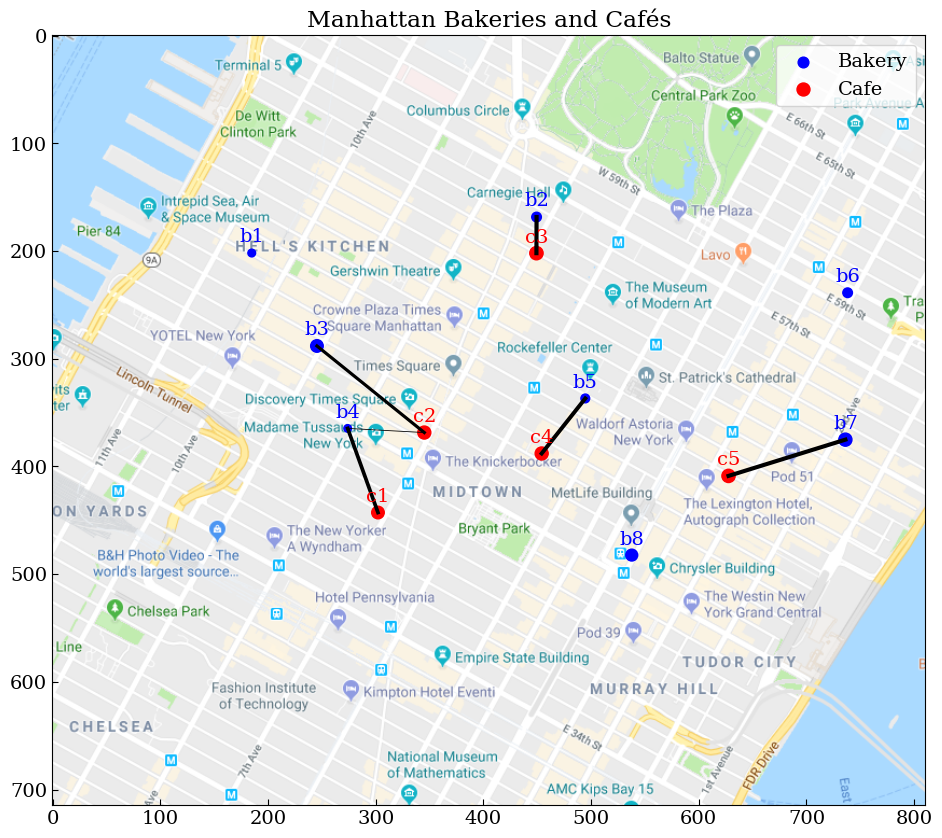

In [8]:
# Biến quyết định
pot_X = cp.Variable((len(bakery_pos), len(cafe_pos)), integer=True)

# Hàm mục tiêu
objective = cp.Minimize(cp.sum(cp.multiply(cost_matrix, pot_X)))

# Giới hạn khối lượng vận chuyển
lambda_param = 0.9

# Thêm ràng buộc mới cho bài toán POT
constraints = [
    cp.sum(pot_X, axis=1) <= extra_bakery_prod,
    cp.sum(pot_X, axis=0) <= cafe_prod,
    cp.sum(pot_X) == np.sum(cafe_prod),
    pot_X >= 0
]

# Giải bài toán
start_time = time.time()
problem = cp.Problem(objective, constraints)
optimal = problem.solve()
cvxpy_pot_time = time.time() - start_time

# In ra kết quả
print("Chi phí vận chuyển tối ưu:", optimal)
print("Đường đi tối ưu:")
for i in range(len(pot_X.flatten().value)):
    if pot_X.flatten().value[i] > 0:
        print(
            "Tiệm bánh "
            + label_list[i][1:2]
            + " đến quán cafe "
            + label_list[i][4:]
            + " "
            + str(int(pot_X.flatten().value[i]))
            + " bánh"
        )
print("Tổng số bánh đã được giao:", np.sum(pot_X.value))
print("Số bánh nướng được ở từng tiệm bánh: {}".format(bakery_prod))
print("Số bánh bán được ở từng cafe: {}".format(cafe_prod))
print("Tổng số bánh bán được ở các quán cafe: {}".format(cafe_prod.sum()))

# vẽ các tiệm cafe và bánh trên bản đồ.
# Kích cỡ của điểm tròn biểu thị sản lượng bánh được làm/bán
# Độ đậm nhạt của đường thẳng biểu thị số bánh được giao
plt.figure()
plt.imshow(data["Imap"], interpolation="bilinear")
plt.scatter(bakery_pos[:, 0], bakery_pos[:, 1], color="b", s=bakery_prod)
plt.scatter(cafe_pos[:, 0], cafe_pos[:, 1], color="r", s=cafe_prod)
for i in range(len(bakery_pos)):
    for j in range(len(cafe_pos)):
        plt.plot(
            [bakery_pos[i, 0], cafe_pos[j, 0]],
            [bakery_pos[i, 1], cafe_pos[j, 1]],
            "-k",
            lw=3.0 * pot_X.value[i, j] / pot_X.value.max(),
        )
# Plot bakery positions with labels
for i, pos in enumerate(bakery_pos):
    plt.text(pos[0], pos[1] - 10, f"b{i+1}", color="b", ha="center")

# Plot cafe positions with labels
for i, pos in enumerate(cafe_pos):
    plt.text(pos[0], pos[1] - 10, f"c{i+1}", color="r", ha="center")

plt.legend(["Bakery", "Cafe"])
plt.title("Manhattan Bakeries and Cafés")
plt.show()

## 3. Regularizer

Regularizer là một hàm được thêm vào hàm mục tiêu nhằm kiểm soát sự phức tạp của nghiệm. Regularizer giúp cải thiện khả năng tính toán và độ ổn định của bài toán Optimal Transport (OT), đặc biệt trong các ứng dụng Machine Learning (ML).

Một bài toán tối ưu hóa với regularizer được viết dưới dạng tổng quát:
$$
\min_{\mathbf{x}} \, f(\mathbf{x}) + \lambda \, R(\mathbf{x}),
$$
trong đó:
- $f(\mathbf{x})$: hàm mục tiêu ban đầu cần tối ưu hóa.
- $R(\mathbf{x})$: hàm regularizer, thường được thiết kế để áp đặt một số tính chất mong muốn lên nghiệm $\mathbf{x}$ (ví dụ: tính trơn tru, độ thưa, hoặc giới hạn kích thước).
- $\lambda > 0$: hệ số điều chỉnh (*regularizer coefficient*), kiểm soát mức độ ảnh hưởng của hàm regularizer.

Khi một regularizer được thêm vào bài toán tối ưu, quá trình tìm nghiệm tối ưu sẽ cân bằng giữa hai mục tiêu:
- **Tối ưu hóa hàm mục tiêu:** Đảm bảo bài toán tập trung vào việc giảm giá trị của $f(\mathbf{x})$.
- **Điều chỉnh nghiệm:** Hạn chế các nghiệm phức tạp hoặc không mong muốn thông qua hàm $R(\mathbf{x})$.

### a) Entropic Regularizer

Thông thường, hàm *Entropic Regularizer* thường được dùng làm hàm regularizer cho bài toán OT. Hàm Entropic Regularizer có ưu thế là:
- Giảm độ phức tạp tính toán thông qua việc làm mịn bài toán.
- Cho phép giải quyết hiệu quả bằng các phương pháp như thuật toán Sinkhorn.

Tuy nhiên, trên bài toán POT, Entropic Regularizer - Sinkhorn đã được chứng minh là không khả thi. Những thuật toán khác, ví dụ như APDAGD, có thể giúp Entropic Regularizer hoạt động trên POT, tuy nhiên Entropic regularized-POT vẫn tồn tại một vài nhược điểm:
- Tạo ra các kế hoạch vận chuyển dày đặc (*dense transport plans*), tốn bộ nhớ, khó diễn giải, và khó áp dụng trên các tập dữ liệu lớn.
- Nhạy cảm với nhiễu, làm giảm độ tin cậy của nghiệm.

Vì vậy, Quadratic Regularizer là một trong những regularizer thích hợp để thay thế Entropic Regularizer. 

### b) Quadratic Regularizer

**Quadratic Regularizer** được định nghĩa như một hàm bình phương:
$$
R(\mathbf{x}) = \frac{1}{2} \|\mathbf{x}\|_2^2 = \frac{1}{2} \sum_{i=1}^n x_i^2,
$$
trong đó $\|\mathbf{x}\|_2^2$ là bình phương chuẩn $L_2$ của vector $\mathbf{x}$. 

Khi sử dụng Quadratic Regularizer, bài toán tối ưu hóa trở thành:
$$
\min_{\mathbf{x}} \, f(\mathbf{x}) + \frac{\lambda}{2} \|\mathbf{x}\|_2^2.
$$

Quadratic Regularizer có các đặc tính sau:
- **Giảm độ lớn của nghiệm:** Quadratic regularizer áp dụng hình phạt tỷ lệ với bình phương độ lớn của nghiệm $\mathbf{x}$. Điều này thường dẫn đến nghiệm với các thành phần nhỏ hơn, hạn chế overfitting.
- **Tính trơn tru:** Do Quadratic Regularizer là một hàm convex và trơn (*smooth*), nó giữ cho bài toán tối ưu hóa dễ giải bằng các phương pháp dựa trên gradient.


In [1]:
def solve_ot(source_hist, target_hist, C):
    n = source_hist.shape[0]
    m = target_hist.shape[0]

    # Khai báo biến
    X = cp.Variable((n, m), nonneg=True)

    # Định nghĩa các ràng buộc cho bài toán OT
    constraints = [
        cp.sum(X, axis=1) == source_hist,  # Tổng theo hàng bằng phân phối nguồn
        cp.sum(X, axis=0) == target_hist,  # Tổng theo cột bằng phân phối đích
    ]

    # Định nghĩa hàm mục tiêu chỉ với cost matrix C mà không có regularizer
    objective = cp.Minimize(cp.sum(cp.multiply(C, X)))

    # Định nghĩa và giải bài toán
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return X.value


# Hàm giải bài toán Optimal Transport (OT) có regularizer
def solve_ot_quadratic_regularization(source_hist, target_hist, C, epsilon):
    n = source_hist.shape[0]
    m = target_hist.shape[0]

    # Khai báo biến
    X = cp.Variable((n, m), nonneg=True)

    # Định nghĩa các ràng buộc cho bài toán OT
    constraints = [
        cp.sum(X, axis=1) == source_hist,  # Tổng theo hàng bằng phân phối nguồn
        cp.sum(X, axis=0) == target_hist,  # Tổng theo cột bằng phân phối đích
    ]

    # Định nghĩa hàm mục tiêu chỉ với cost matrix C mà không có regularizer
    objective = cp.Minimize(
        cp.sum(cp.multiply(C, X)) + (epsilon / 2) * cp.norm(X, "fro") ** 2
    )

    # Định nghĩa và giải bài toán
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return X.value


def solve_ot_entropic_regularization(source_hist, target_hist, C, epsilon):
    n = source_hist.shape[0]
    m = target_hist.shape[0]

    # Khai báo biến
    X = cp.Variable((n, m), nonneg=True)

    # Định nghĩa các ràng buộc cho bài toán OT
    constraints = [
        cp.sum(X, axis=1) == source_hist,  # Tổng theo hàng bằng phân phối nguồn
        cp.sum(X, axis=0) == target_hist,  # Tổng theo cột bằng phân phối đích
    ]

    # Định nghĩa hàm mục tiêu chỉ với cost matrix C mà không có regularizer
    def entropy(X):
        tau = 1e-10
        return cp.sum(cp.entr(X + tau))  # Use the entr function which is DCP-compliant

    # Define the objective function
    objective = cp.Minimize(cp.sum(cp.multiply(C, X)) - (epsilon / 2) * entropy(X))

    # Định nghĩa và giải bài toán
    prob = cp.Problem(objective, constraints)
    prob.solve(solver=cp.SCS)

    return X.value


def solve_pot(source_hist, target_hist, C, s):
    n = source_hist.shape[0]
    m = target_hist.shape[0]

    # Khai báo biến
    X = cp.Variable((n, m), nonneg=True)

    # Định nghĩa các ràng buộc cho bài toán OT
    constraints = [
        cp.sum(X, axis=1) <= source_hist,  # Tổng theo hàng bằng phân phối nguồn
        cp.sum(X, axis=0) <= target_hist,  # Tổng theo cột bằng phân phối đích
        cp.sum(X) == s,
    ]

    # Định nghĩa hàm mục tiêu chỉ với cost matrix C mà không có regularizer
    objective = cp.Minimize(cp.sum(cp.multiply(C, X)))

    # Định nghĩa và giải bài toán
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return X.value


# Hàm giải POT với quadratic regularizer
def solve_pot_quadratic_regularization(source_hist, target_hist, C, s, epsilon):
    n = source_hist.shape[0]
    m = target_hist.shape[0]

    # Khai báo biến
    X = cp.Variable((n, m), nonneg=True)

    # Định nghĩa các ràng buộc cho bài toán OT
    constraints = [
        cp.sum(X, axis=1) <= source_hist,  # Tổng theo hàng bằng phân phối nguồn
        cp.sum(X, axis=0) <= target_hist,  # Tổng theo cột bằng phân phối đích
        cp.sum(X) == s,
    ]

    # Định nghĩa hàm mục tiêu chỉ với cost matrix C mà không có regularizer
    objective = cp.Minimize(
        cp.sum(cp.multiply(C, X)) + (epsilon / 2) * cp.norm(X, "fro") ** 2
    )

    # Định nghĩa và giải bài toán
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return X.value


# Hàm giải bài toán Optimal Transport (OT) không có regularizer
def solve_pot_entropic_regularization(source_hist, target_hist, C, s, epsilon):
    n = source_hist.shape[0]
    m = target_hist.shape[0]

    # Khai báo biến
    X = cp.Variable((n, m), nonneg=True)

    # Định nghĩa các ràng buộc cho bài toán OT
    constraints = [
        cp.sum(X, axis=1) <= source_hist,  # Tổng theo hàng bằng phân phối nguồn
        cp.sum(X, axis=0) <= target_hist,  # Tổng theo cột bằng phân phối đích
        cp.sum(X) == s,
    ]

    # Định nghĩa hàm mục tiêu chỉ với cost matrix C mà không có regularizer
    def entropy(X):
        tau = 1e-10
        return cp.sum(cp.entr(X + tau))  # Use the entr function which is DCP-compliant

    # Define the objective function
    objective = cp.Minimize(cp.sum(cp.multiply(C, X)) - (epsilon / 2) * entropy(X))

    # Định nghĩa và giải bài toán
    prob = cp.Problem(objective, constraints)
    prob.solve(solver=cp.SCS, max_iters=5000)

    return X.value

In [2]:
# Hàm tạo phân phối Mixed Gaussian
def generate_mixed_gaussian(n_samples, n_bins, mu1, sigma1, mu2, sigma2):
    bernoulli = np.random.binomial(n=1, p=0.5, size=n_samples)
    gaussian1 = np.random.normal(mu1, sigma1, n_samples)
    gaussian2 = np.random.normal(mu2, sigma2, n_samples)
    dist = gaussian1 * bernoulli + gaussian2 * (1 - bernoulli)

    x = np.linspace(min(dist), max(dist), n_samples)
    p, edges = np.histogram(dist, bins=n_bins, density=True)

    pdf = 0.5 * (
        1 / (sigma1 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu1) / sigma1) ** 2)
    ) + 0.5 * (
        1 / (sigma2 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu2) / sigma2) ** 2)
    )

    return dist, p, edges, x, pdf

# Hàm tạo phân phối Gamma
def generate_gamma(n_samples, n_bins, shape, scale):
    dist = np.random.gamma(shape, scale, n_samples)

    x = np.linspace(min(dist), max(dist), n_samples)
    p, edges = np.histogram(dist, bins=n_bins, density=True)

    pdf = (x ** (shape - 1) * np.exp(-x / scale)) / (scale**shape * gamma(shape))

    return dist, p, edges, x, pdf


def measure_sparsity(solution_matrix, threshold=1e-10):
    """
    Hàm này đo lường sparsity của một ma trận, xem xét các phần tử có giá trị tuyệt đối
    nhỏ hơn ngưỡng đã chỉ định là bằng 0.

    Sparsity được định nghĩa là tỷ lệ các phần tử được xem là bằng 0 trong ma trận.

    Tham số:
    solution_matrix (np.ndarray): Ma trận cần đo lường sparsity.
    threshold (float): Ngưỡng dưới đó các phần tử được coi là bằng 0 (mặc định là 1e-10).

    Trả về:
    float: Độ sparsity của ma trận, dưới dạng giá trị từ 0 đến 1.
    """
    # Đếm số lượng phần tử được coi là bằng 0 (nhỏ hơn ngưỡng)
    zero_elements = np.sum(np.abs(solution_matrix) < threshold)

    # Tính tổng số phần tử trong ma trận
    total_elements = solution_matrix.size

    # Tính độ sparsity dưới dạng tỷ lệ của các phần tử được coi là bằng 0
    sparsity = zero_elements / total_elements

    return sparsity


# Số lượng bins và samples
n_bins = 100
n_samples = 100000

# Tham số cho phân phối Mixed Gaussian
mu1, sigma1 = 1, 2
mu2, sigma2 = 10, 1.5

# Tạo phân phối Mixed Gaussian
dist_a, p_a, edges_a, x_a, pdf_a = generate_mixed_gaussian(
    n_samples, n_bins, mu1, sigma1, mu2, sigma2
)
p_a = p_a / np.sum(p_a)

# Tham số cho phân phối Gamma
shape_b, scale_b = 7, 1

# Tạo phân phối Gamma
dist_b, p_b, edges_b, x_b, pdf_b = generate_gamma(n_samples, n_bins, shape_b, scale_b)

# Điều chỉnh p_b để tạo p_b_pot (Partial Optimal Transport)
p_b_pot = p_b / np.sum(p_b) * 0.6
p_b = p_b / np.sum(p_b)

edges_a = edges_a[:-1]
edges_b = edges_b[:-1]

# Ma trận Cost sử dụng L2 norm
C = (edges_a.reshape((n_bins, 1)) - edges_b.reshape((1, n_bins))) ** 2


# Vẽ 2 phân phối
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram and density line của phân phối mixed Gaussian
ax1.hist(
    dist_a,
    bins=n_bins,
    density=True,
    alpha=0.5,
    color="navy",
    edgecolor="white",
    label="Histogram",
)

ax1.plot(x_a, pdf_a, color="red", label="Density")
ax1.set_title(
    "Mixed Gaussian distribution\n0.5*$\mathcal{N}(1, 2)$ + 0.5*$\mathcal{N}(10, 1.5)$"
)
ax1.set_xlabel("Value")
ax1.set_ylabel("Density")
ax1.legend()

# Histogram and density line của phân phối Gamma
ax2.hist(
    dist_b,
    bins=n_bins,
    density=True,
    alpha=0.5,
    color="navy",
    edgecolor="white",
    label="Histogram",
)

ax2.plot(x_b, pdf_b, color="red", label="Density")
ax2.set_title("Gamma(7, 1)")
ax2.set_xlabel("Value")
ax2.legend()

plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

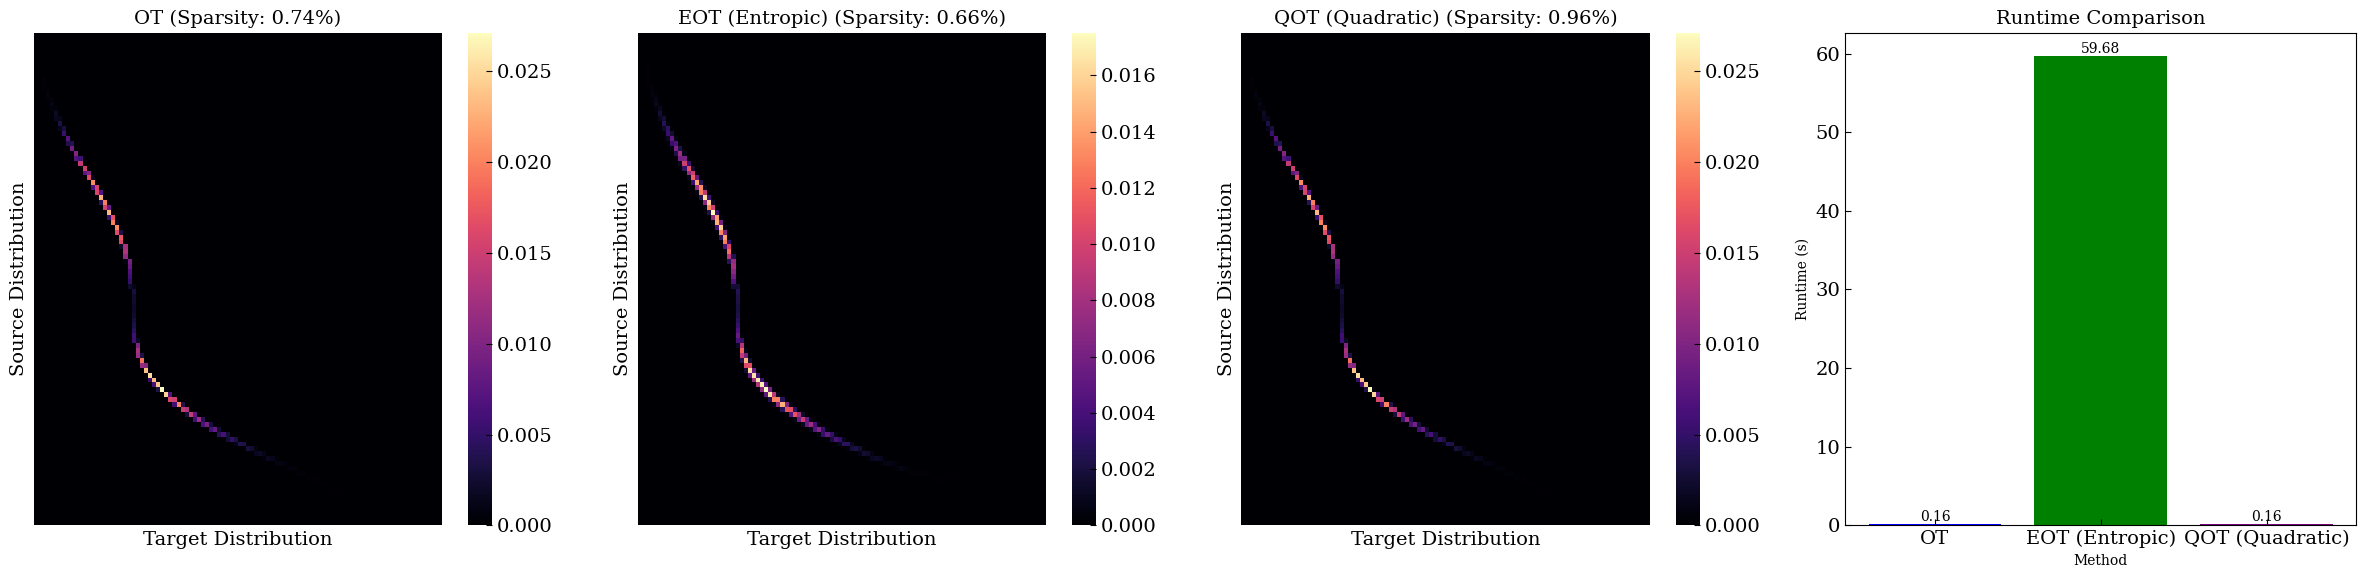

In [ ]:
# Run OT
start_time = time.time()
T_ot = solve_ot(p_a, p_b, C)
runtime_OT = time.time() - start_time
sparsity_OT = measure_sparsity(T_ot)

# Run EOT
start_time = time.time()
T_eot = solve_ot_entropic_regularization(p_a, p_b, C, epsilon=0.1)
runtime_EOT = time.time() - start_time
sparsity_EOT = measure_sparsity(T_eot)

# Run QOT
start_time = time.time()
T_qot = solve_ot_quadratic_regularization(p_a, p_b, C, epsilon=0.1)
runtime_QOT = time.time() - start_time
sparsity_QOT = measure_sparsity(T_qot)


runtimes = [runtime_OT, runtime_EOT, runtime_QOT]
labels = ["OT", "EOT (Entropic)", "QOT (Quadratic)"]
transport_plans = [T_ot, T_eot, T_qot]
sparsities = [sparsity_OT, sparsity_EOT, sparsity_QOT]

# Create a single-row subplot with 4 columns
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Heatmaps for transport plans
for i, (ax, plan, label, sparsity) in enumerate(
    zip(axes[:3], transport_plans, labels, sparsities)
):
    sns.heatmap(plan, annot=False, cmap="magma", cbar=True, ax=ax)
    ax.set_title(f"{label} (Sparsity: {sparsity:.2f}%)", fontsize=14)
    ax.set_xlabel("Target Distribution")
    ax.set_ylabel("Source Distribution")
    ax.set_xticks([])
    ax.set_yticks([])

# Runtime histogram as the fourth plot
ax = axes[3]
bars = ax.bar(labels, runtimes, color=["blue", "green", "purple"])

# Add values above each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.05,  # Slightly above the bar
        f"{yval:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

ax.set_ylabel("Runtime (s)", fontsize=10)
ax.set_xlabel("Method", fontsize=10)
ax.set_title("Runtime Comparison", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

h:\Materials\AI Courses\.venv\lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


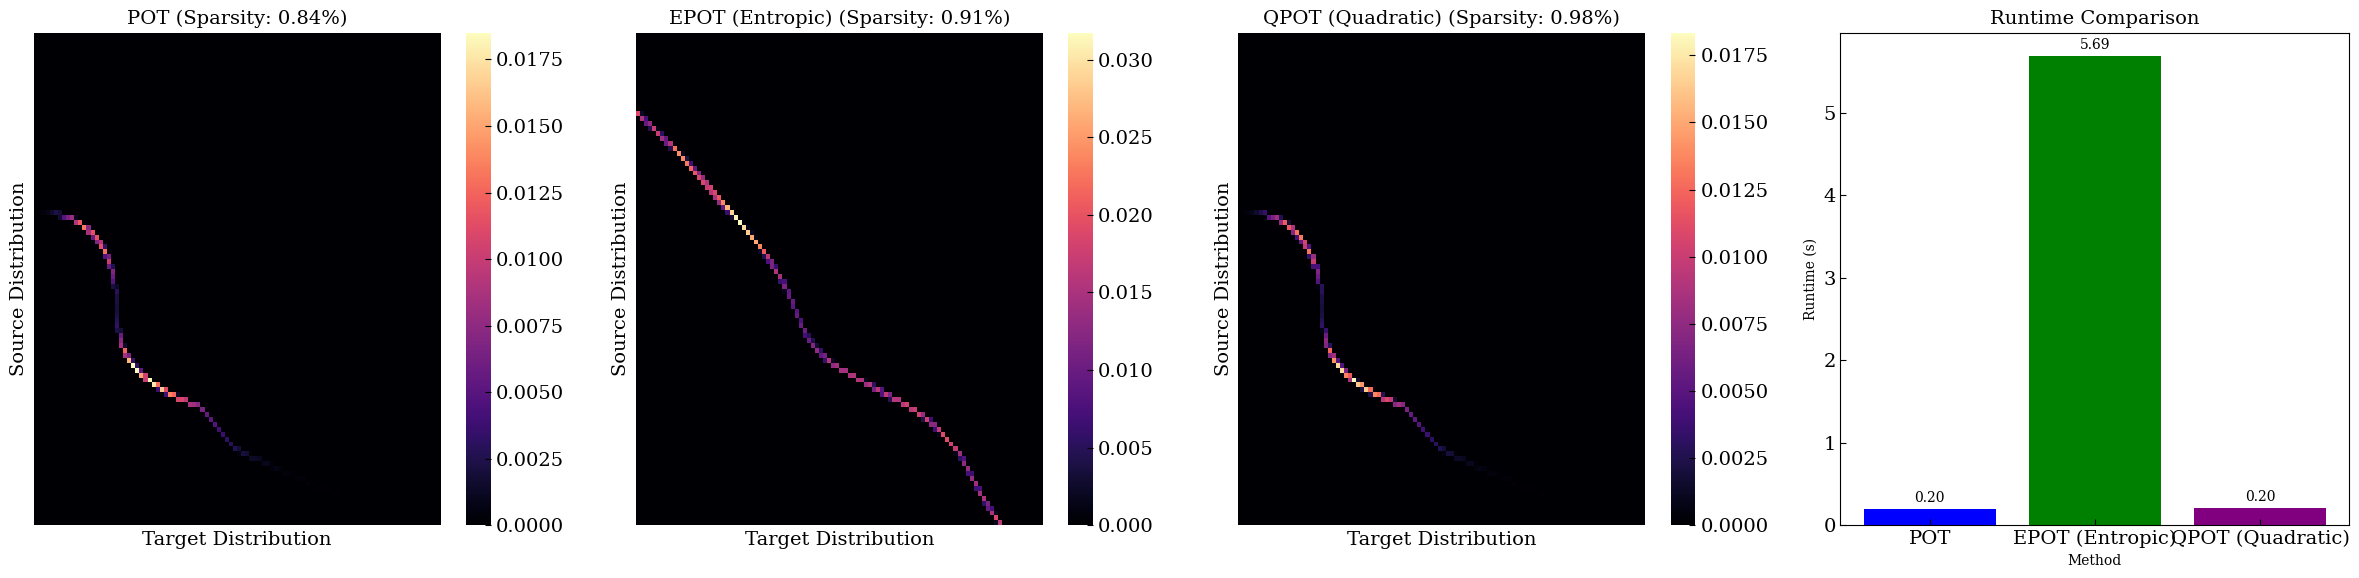

In [ ]:
# Run POT
start_time = time.time()
T_pot = solve_pot(p_a, p_b_pot, C, s=0.6)
runtime_POT = time.time() - start_time
sparsity_POT = measure_sparsity(T_pot)

# Run EPOT
start_time = time.time()
T_epot = solve_pot_entropic_regularization(p_a, p_b_pot, C, s=0.6, epsilon=0.1)
runtime_EPOT = time.time() - start_time
sparsity_EPOT = measure_sparsity(T_epot)

# Run QPOT
start_time = time.time()
T_qpot = solve_pot_quadratic_regularization(p_a, p_b_pot, C, s=0.6, epsilon=0.1)
runtime_QPOT = time.time() - start_time
sparsity_QPOT = measure_sparsity(T_qpot)


runtimes = [runtime_POT, runtime_EPOT, runtime_QPOT]
labels = ["POT", "EPOT (Entropic)", "QPOT (Quadratic)"]
transport_plans = [T_pot, T_epot, T_qpot]
sparsities = [sparsity_POT, sparsity_EPOT, sparsity_QPOT]

# Create a single-row subplot with 4 columns
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Heatmaps for transport plans
for i, (ax, plan, label, sparsity) in enumerate(
    zip(axes[:3], transport_plans, labels, sparsities)
):
    sns.heatmap(plan, annot=False, cmap="magma", cbar=True, ax=ax)
    ax.set_title(f"{label} (Sparsity: {sparsity:.2f}%)", fontsize=14)
    ax.set_xlabel("Target Distribution")
    ax.set_ylabel("Source Distribution")
    ax.set_xticks([])
    ax.set_yticks([])

# Runtime histogram as the fourth plot
ax = axes[3]
bars = ax.bar(labels, runtimes, color=["blue", "green", "purple"])

# Add values above each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.05,  # Slightly above the bar
        f"{yval:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

ax.set_ylabel("Runtime (s)", fontsize=10)
ax.set_xlabel("Method", fontsize=10)
ax.set_title("Runtime Comparison", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()